In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from ipywidgets import interact_manual
import ipywidgets as widgets

widgets.interact_manual.opts['manual_name'] = "Cycle!"
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# **Problem #3 - Box Models**

>Please check a standalone version of this homework at:
>
>|**[Voila version]**: |[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/LinearBoxModels/master?urlpath=voila%2Frender%2FSaavedraC_hw3.ipynb)|
>|---|---|
>|**[Classic notebook]**: |[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/LinearBoxModels/master?filepath=SaavedraC_hw3.ipynb)|
>
>
>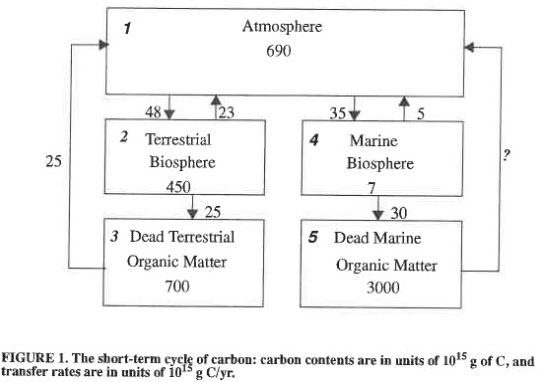
>
> *H. Holland (1978)*

**Notation:**

The **mass** of carbon (in units of $10^{15}$ g) in each of the five boxes is denoted as $M_j$ where $j$ corresponds to the box number. For instance, $M_1 = 690$. The boxes in the model are:

- $j=1$ is the atmosphere
- $j=2$ is the terrestrial biosphere
- $j=3$ is the dead terrestrial organic matter
- $j=4$ is the marine biosphere
- $j=5$ is the dead marine organic matter

The carbon **fluxes** between boxes (in units of $10^{15}$ g/a) are denoted as $J_{i,j}$ where $i$ indicates the origin of the flux and $j$ the receiving end of the flux. For example, $J_{1,2} = 48$. Similarly, the first order **rate constants** (in units of a$^{-1}$) are denoted as $k_{i,j}$ following the same logic that for fluxes. This notation will involve transposing some matrices to keep the nomenclature rolling.

**Assumptions:**

· All outbound mass exchanges in the system are linearly dependant of the mass in the box:


\begin{equation}
\dfrac{dM_i}{dt} = \sum_\limits{m}J_{m,i} - \sum_\limits{n}J_{i,n} \quad|\quad J_{i,n} = k_{i,n}M_i
\end{equation}

· The carbon cycle is the steady-state result of multiples linear processes.

## **1. Completing the carbon cycle**

For the steady state depicted in the figure, a mass balance can be calculated around the box No. 5:


\begin{equation}
\dfrac{dM_5}{dt} = J_{4,5} - J_{5,1} = 0 \quad \Rightarrow \quad J_{5,1} = J_{4,5} = 30
\end{equation}

## **2. First order rate constants**

The mass balance of the five boxes in the system can be written in terms of the in/out fluxes or the rate constants as:

\begin{equation}
\begin{array}{rclcl}
\frac{dM_1}{dt} &=& J_{2,1} + J_{3,1} + J_{4,1} + J_{5,1} - J_{1,2} - J_{1,4} &=& k_{2,1}M_2 + k_{3,1}M_3 + k_{4,1}M_4 + k_{5,1}M_5 - (k_{1,2} + k_{1,4})M_1\\
\frac{dM_2}{dt} &=& J_{1,2} - J_{2,1} - J_{2,3} &=& k_{1,2}M_1 - (k_{2,1} + k_{2,3})M_2\\
\frac{dM_3}{dt} &=& J_{2,3} - J_{3,1} &=& k_{2,3}M_2 - k_{3,1}M_3\\
\frac{dM_4}{dt} &=& J_{1,4} - J_{4,1} - J_{4,5} &=& k_{1,4}M_1 - (k_{4,1} + k_{4,5})M_4\\
\frac{dM_5}{dt} &=& J_{4,5} - J_{5,1} &=& k_{4,5}M_4 - k_{5,1}M_5\\
\end{array}
\end{equation}

Since we have a steady-state result for $m = (M_1,M_2,M_3,M_4,M_5)$ and the corresponging fluxes $J$, we can solve for the rate constants:

\begin{equation}
k_{i,j}=\dfrac{J_{i,j}}{M^{\infty}_i}
\quad|\quad
m_{(t\to\infty)} = M^\infty=
\begin{pmatrix}
690\\450\\700\\7\\3000
\end{pmatrix}
\end{equation}

In [2]:
##################################################
## Model Inputs 
##################################################

# Steady-state mass in each box
MASS_STEADY = np.array([690,450,700,7,3000],dtype=float)

# Steady-state fluxes
FLUX = np.array([[0,48,0,35,0],\
              [23,0,25,0,0],\
              [25,0,0,0,0],\
              [5,0,0,0,30],\
              [30,0,0,0,0]\
             ],dtype=float)

##################################################
## Calculate first-order rate constants
##################################################
kRATES = np.zeros_like(FLUX)
for i in range(len(FLUX)):
    kRATES[i] = FLUX[i]/MASS_STEADY[i]

Having calculated the linear constant rates, our system of differential equations is given by the system:

\begin{equation}
\begin{array}{rl}
m'(t)=& Km(t)\\
\\
=& 
\begin{pmatrix}
- (k_{1,2} + k_{1,4}) & k_{2,1} & k_{3,1} & k_{4,1} & k_{5,1}\\
k_{1,2} & - (k_{2,1} + k_{2,3}) & 0 & 0 & 0 \\
0 & k_{2,3} & - k_{3,1} & 0 & 0 \\
k_{1,4} & 0 & 0 & -(k_{4,1} + k_{4,5}) & 0 \\
0 & 0 & 0 & k_{4,5} & - k_{5,1}\\
\end{pmatrix}
\begin{pmatrix}
M_1\\M_2\\M_3\\M_4\\M_5
\end{pmatrix}
\end{array}
\end{equation}

> _weak diagonally dominant_

In [3]:
##################################################
## Assemble the system's K matrix (KSYS)
##################################################
KSYS = np.zeros_like(kRATES)

# The trace of the system matrix corresponds to the 
# outbound fluxes
for i in range(len(FLUX)):
    KSYS[i,i]=np.sum(kRATES[i,:])

# Assemble inflows and outflow rates 
KSYS = (-KSYS + kRATES).T

print("K = ",end="\n")
print(KSYS)

K = 
[[-0.120  0.051  0.036  0.714  0.010]
 [ 0.070 -0.107  0.000  0.000  0.000]
 [ 0.000  0.056 -0.036  0.000  0.000]
 [ 0.051  0.000  0.000 -5.000  0.000]
 [ 0.000  0.000  0.000  4.286 -0.010]]


## **3. Eigenvalues and eigenvectors**

Our first-order differential equation $m'(t)= Km(t)$ has as solution:

\begin{equation}
m(t) = \sum_\limits{i=1}^\limits{n} c_i\exp{(\lambda_i t)u_i}
\end{equation}

- $\lambda$ are the eigenvalues of the matrix $K$
- $u$ are the eigenvectors of the matrix $K$
- $c$ are integration constants

In [4]:
##################################################
## Characteristics of K matrix
##################################################
EigVal, EigVect = np.linalg.eig(KSYS);
print("\nEigenvectors:")
for i in range(len(EigVect)):
    print("   u%i = " %(i+1), end=" ")
    print(EigVect[i])
    
print("\nEigenvalues:")
for i in range(len(EigVal)):
    print("         λ%i =  %.2e" %(i+1,EigVal[i]))

print("---------------------------")
print("      Trace Σλ = %.3e" %np.trace(KSYS))
print("   Determinant = %.3e   (as np.det)" %np.linalg.det(KSYS))

def multiEigs(Eigs):
    DET = 1
    for i in Eigs: DET = DET*i
    return DET
    
print("   Determinant = %.3e   (as Πλ)" %multiEigs(EigVal))


Eigenvectors:
   u1 =  [ 0.109 -0.572  0.202 -0.216 -0.183]
   u2 =  [-0.002  0.733  0.644 -0.141 -0.146]
   u3 =  [ 0.000 -0.325 -0.728 -0.220 -0.502]
   u4 =  [-0.755 -0.006  0.002 -0.002 -0.002]
   u5 =  [ 0.647  0.170 -0.120 -0.941  0.833]

Eigenvalues:
         λ1 =  -5.01e+00
         λ2 =  -1.61e-01
         λ3 =  -8.48e-02
         λ4 =  -9.66e-17
         λ5 =  -1.96e-02
---------------------------
      Trace Σλ = -5.273e+00
   Determinant = 4.310e-21   (as np.det)
   Determinant = -1.293e-19   (as Πλ)


In our case, all the eigenvalues are real and non-positive, meaning that a unique steady state will be reached regardless the initial conditions. 

To check that everything is working until this point, we can check that our initial steady state solution renders a derivative equal to zero, i.e., $m'(t)= KM^\infty = 0$ 

In [5]:
# Check that everything is working
print("K·M∞ = ", end=" ")
print(np.linalg.norm(np.dot(KSYS,MASS_STEADY)))

K·M∞ =  0.0


## **4. Solving the system**

Our first-order differential equation $\dot{m}(t)= Km(t)$ with $ \Lambda < 0$ has as solution of the form:

\begin{equation}
\begin{array}{rcl}
    m(t) &=& \sum_\limits{i=1}^\limits{n} c_i\exp{(\lambda_i t)}u_i\\
    \\
    &=& U \cdot (C * \exp{\Lambda_t }) \\
\end{array}
\end{equation}

- The integration constants are grouped as $C=(c_1,...,c_n)$ 
- The eigenvalues are gropued as a vector $\Lambda = (\lambda_1,...,\lambda_n)$
- The scalar multiplication of $\Lambda$ by the independent variable $t$ is $\Lambda_t = (\lambda_1t,...,\lambda_nt)$
- The $*$ operation is a element-wise multiplication: $C*X = (c_1x_1,...,c_nx_n)$. 
- The eigenvectors $u_i$ can be aranged in a matrix $U$ where each column represents each eigenvector.

For an initial condition $m_{(t=0)} = M_0 \: \Leftarrow \: \exp{\Lambda_t}= 1$, hence:

\begin{equation}
    m_{(t=0)} = M_0 = UC \quad \Rightarrow \quad C = U^{-1}M_0
\end{equation}

Therefore, for a given time $t>0$, the state of the system is given by:

\begin{equation}
    m(t) = U\cdot(C * \exp{\Lambda}t) 
\end{equation}

In [6]:
##################################################
## Solve the system for the given time t and 
## initial conditions MASS_NOT
##################################################
def SolveSystem(MASS_NOT):
    #Calculate integration constants
    INTEGRC = np.dot(np.linalg.inv(EigVect),MASS_NOT)
       
    ANSW = np.zeros_like(EigVal) #Initialize matrix to store results
    
    #Solve for all the timesteps!
    for t in TIME:
        EXPT = np.exp(EigVal*t)                   #exp(λt)
        COEF = np.multiply(INTEGRC,EXPT)          #c.exp(λt)
        MofT = np.dot(EigVect,COEF)               #c.exp(λt)u
        ANSW = np.vstack((ANSW,MofT))             #Store results
    
    ANSW = np.delete(ANSW,0,axis=0) #Trim first row of zeros
    plotResults(ANSW);
    

In [7]:
##################################################
## Pretty plotting
##################################################
def plotResults(ANSW):
    fig = plt.figure(figsize=(12,12),facecolor="white");   
    gs1 = gs.GridSpec(nrows=5,ncols=4)
    
    Labels = ["Atmosphere",\
          "Terrestrial biosphere",\
          "Dead terrestial\norganic matter",\
          "Marine biosphere",\
          "Dead marine \norganic matter"
         ]
    
    Colors = ["darkmagenta","darkgreen","seagreen","dodgerblue","dimgrey"]
    FaceColors = ["lavenderblush","honeydew","mintcream","aliceblue","whitesmoke"]
    
    ##################################################
    ## Evolution of each box in the system over time
    ##################################################
    ax2 = [fig.add_subplot(gs1[i,0:2]) for i in range(len(EigVal))]
    for i in range(len(EigVal)):
        ax2[i].set_facecolor(FaceColors[i])
        ax2[i].plot(TIME,ANSW[:,i],label=Labels[i],c=Colors[i],lw=3)
        if i > 0 : ax2[i].get_shared_x_axes().join(ax2[0], ax2[i])
        ax2[i].set_xlim(0,99.9)
        ax2[i].text(45,(ANSW[-1,i]+ANSW[0,i])/2,Labels[i],\
             fontdict={'weight':'bold','size':10,'color':Colors[i]})
        ax2[i].yaxis.set_major_locator(plt.MaxNLocator(3))
        if i == 2: ax2[i].set_ylabel("Carbon mass [$x10^{15}$ g]",fontsize="large")
        
    fig.subplots_adjust(hspace=0,wspace=0.03)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    ax2[-1].set_xlabel("Time [$a$]",fontsize="large")
    
    ##################################################
    ## Evolution of all boxes over time
    ##################################################
    ax1 = fig.add_subplot(gs1[1:4,2:4])
    for i in range(len(EigVal)):
        ax1.plot(TIME,ANSW[:,i],label=DESCR[i],c=Colors[i],lw=3)
    ax1.set_xlim(0,99)
    ax1.set_ylim(bottom=0)
    #ax1.set_xscale("log")
    #ax1.set_yscale("log")
    ax1.yaxis.tick_right()
    ax1.set_ylabel("Carbon mass [$x10^{15}$ g]",fontsize="large",rotation=270)
    ax1.set_xlabel("Time [$a$]",fontsize="large")
    ax1.yaxis.set_label_coords(1.12,0.5)
    ax1.legend(loc='upper center',bbox_to_anchor=(0.5, -0.11),\
               fontsize="large",markerscale=4,ncol=2)

    ##################################################
    ## Where's the carbon? Initial and end states
    ##################################################
    scX,scY = [6,3,7,7,3],[8,8,4.5,1.5,3.5]
    scXt,scYt = [6,3,7,7.8,3],[8,8,4.5,1.75,3.5]
    ## Initial condition
    ax3 = fig.add_subplot(gs1[0,2])
    ax3.set_xlim(0,10)
    ax3.set_ylim(0,10)
    ax3.scatter(scX,scY,c=FaceColors,s=2*(ANSW[0,:]),linewidths=3,edgecolors=Colors)
    ax3.axes.xaxis.set_visible(False)
    ax3.axes.yaxis.set_visible(False)
    ax3.set_frame_on(False)
    ax3.set_title("Initial Condition",fontsize="small")
    for i,txt in enumerate(ANSW[0,:]): 
        ax3.annotate("%.0f" %txt,(scXt[i],scYt[i]),\
                     c=Colors[i],fontsize="small",fontweight="bold",\
                     va='center',ha='center',size=12)
    
    ## Final condition
    ax4 = fig.add_subplot(gs1[0,3])
    ax4.set_xlim(0,10)
    ax4.set_ylim(0,10)
    ax4.scatter(scX,scY,c=FaceColors,s=2*(ANSW[-1,:]),linewidths=3,edgecolors=Colors)
    ax4.axes.xaxis.set_visible(False)
    ax4.axes.yaxis.set_visible(False)
    ax4.set_frame_on(False)
    ax4.set_title("After %i years" %TIME[-1],fontsize="small")
    for i,txt in enumerate(ANSW[-1,:]): 
        ax4.annotate("%.0f" %txt,(scXt[i],scYt[i]),\
                     c=Colors[i],fontsize="small",fontweight="bold",\
                     va='center',ha='center',size=12)       
    plt.show();

In [8]:
##################################################
## Dummy function to assemble the 
## initial condition MASS_NOT
##################################################
def RunAll(M1,M2,M3,M4,M5):
    MASS_NOT = np.array([M1,M2,M3,M4,M5],dtype=float);
    SolveSystem(MASS_NOT);
    return None

In [9]:
##################################################
## Define the time period to solve for
##################################################
TIME = np.arange(0,100.1,0.1)

In [10]:
##################################################
## Interactive sliders to set the 
## initial condition
##################################################

#Sliders description
DESCR = ["Atmosph (1)",\
         "Terr. Bio. (2)",\
         "Dead TB (3)",\
         "Marine Bi. (4)",\
         "Dead MB (5)"]

#Solve!
interact_manual(RunAll,
              M1=widgets.IntSlider(description=DESCR[0], min=0, max=1000, value=800 , step=10),\
              M2=widgets.IntSlider(description=DESCR[1], min=0, max=1000, value=450 , step=10),\
              M3=widgets.IntSlider(description=DESCR[2], min=0, max=1000, value=700 , step=10),\
              M4=widgets.IntSlider(description=DESCR[3], min=0, max=100 , value=7   , step=1),\
              M5=widgets.IntSlider(description=DESCR[4], min=0, max=5000, value=3000, step=100));

interactive(children=(IntSlider(value=800, description='Atmosph (1)', max=1000, step=10), IntSlider(value=450,…

In case the widget above did not work, here is the solution for the case where $110 \times 10^{15}$ g of carbon suddenly enter the atmosphere.

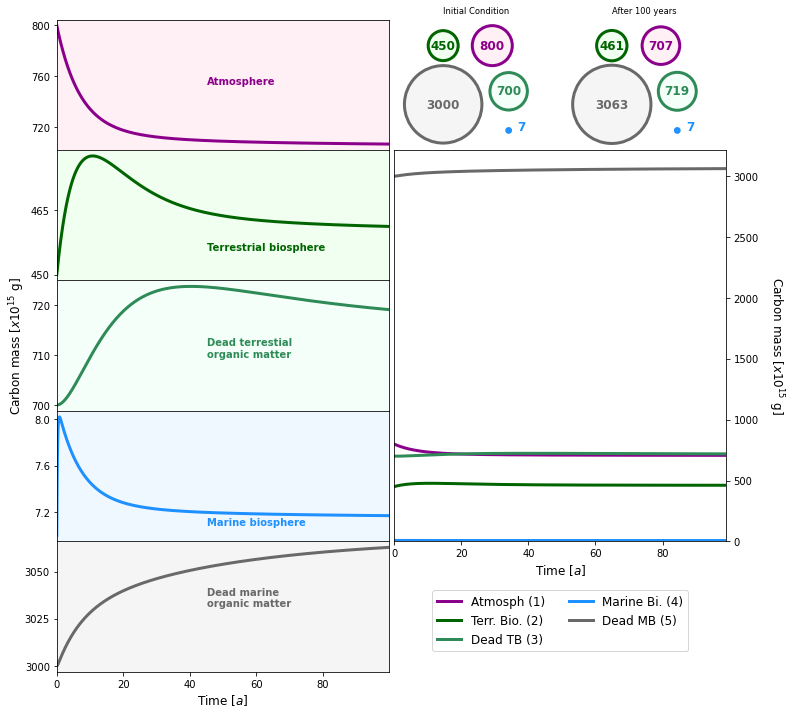

In [11]:
##################################################
## Solve manually if widgets did not work :(
##################################################
#Initial masses
M1 = 800  #"Atmosph (1)"
M2 = 450  #"Terr. Bio. (2)"
M3 = 700  #"Dead TB (3)"
M4 = 7    #"Marine Bi. (4)"
M5 = 3000 #"Dead MB (5)"

#Solve!
RunAll(M1,M2,M3,M4,M5);

## **5. Residence & response time**

The residence time for each independent box is the inverse of the rate constant asociated with each flux. The characteristic response time for the whole closed system $\tau_e$ is going to be the reciprocal of the trace's matrix, i.e., it combines all possible rate constants.

\begin{equation}
\begin{array}{rl}
    \tau_e =& \dfrac{1}{{\rm tr}(K)}\\
    \\
    =& \dfrac{1}{\sum_\limits{i=1}^\limits{n} |K_{i,i}|} \\
    \\
    \approx& \dfrac{1}{\min{|\lambda_i|}}
\end{array}
\end{equation}

In [12]:
##################################################
## Print residence and response time
##################################################
print("Residence times [a]: ")
for i in kRATES:
    for j in i:
        if j != 0:
            RESTIME = 1./j
            print(" %.2f " %RESTIME , end=" ")

print("\n\nResponse Time [a]:")
print("  · as  1/tr(K): %.3f" %(-1./np.trace(KSYS)))
print("  · as 1/min(λ): %.3f" %(-1./min(EigVal)))

Residence times [a]: 
 14.38   19.71   19.57   18.00   28.00   1.40   0.23   100.00  

Response Time [a]:
  · as  1/tr(K): 0.190
  · as 1/min(λ): 0.200


The slowest individual rate corresponds to the flux between the dead marine organic matter and the atmosphere (box No. 5 to No. 1) which gives a response time of 100 years. Conversely, the fastest individual rate is given by the flow from marine biosphere to the dead marine organic matter (box No. 4 to No. 5) which gives a response time of only 0.23 years. The latter will dominate the entire process, driving the response time of the system to only 0.20 years! 

However, this number does not really describe the individual response of each box in the system:
- The marine biosphere (the one involved with the fastest rate constant) reaches a peak around that time an then proceeds towards a steady state.
- The carbon mass in the dead marine organic matter reservoir only increases over time and a clear steady state seems to be expected only after 100 years.
- The terrestrial biosphere and the dead terrestrial organic matter reservoirs have a peak in carbon mass before evolving towards a steady state.
- Conversely, mass carbon in the atmosphere only decreases over time which makes sense given that the forcing on the system was an instantaneous increase on its previous steady state. The concavity of all this curves flips when a instantaneous decrease in carbon in the atmosphere is tried.